<a href="https://colab.research.google.com/github/dniggl/Insights/blob/main/Scrape_Images_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Web scrape images with python and selenium.

**Install Selenium Package**

In [ ]:
# Install selenium 
!pip install selenium

Selenium is a python library that can scrape data on websites dynamically. It can also be used for web automation & testing. Scraping data from the web is only a small portion of the selenium library. Some of the features of Selenium include:


*   Multi-Browser Compatibility
*   Multiple Language Support
*   Handling of Dynamic Web Elements
*   Easy to Identify Web Elements
*   Speed and Performance
*   Open Source and Portable


**Import the Libraries**

In [ ]:
# Import the libraries.
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
import urllib
import time



*   requests allows you to send HTTP requests to a web server which returns a Response Object with all the response data (i.e. HTML).
*   webdriver drives the browser in various ways such as loading pages, switching to different windows/frames and getting page titles.
*   urllib is a package that contains several modules for working with URLs such as opening and reading url's.
*   time function is used to count the number of seconds elapsed since the epoch.





**Install the Web Driver**

In [ ]:
# Install the chrome web driver from selenium. 
!apt-get update 
!apt install chromium-chromedriver

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

The web driver is a key component of selenium. The web driver is a browser automation framework that works with open source APIs. The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.

Selenium supports multiple web browsers and offers web drivers for each browser. I have imported the chrome web driver from selenium. Alternatively, you can download the web driver for your specific browser and store it in a location where it can be easily accessed (C:\users\webdriver\chromedriver.exe). You can download a web driver for your browser at this site https://selenium-python.readthedocs.io/installation.html#:~:text=Selenium%20requires%20a-,driver,-to%20interface%20with

**Launch Browser and Open the URL**

Create url variable containing the webpage for a Google image search. 

In [4]:
url = ("https://www.google.com/search?q={s}&tbm=isch&tbs=sur%3Afc&hl=en&ved=0CAIQpwVqFwoTCKCa1c6s4-oCFQAAAAAdAAAAABAC&biw=1251&bih=568")

Launch the browser and open the given url in your webdriver.
We format the url in our search by adding a search word in place of "s". In this case, we have formatted the value of s to be "Pets".

In [5]:
driver.get(url.format(s='Pets'))

**Load the Images**

The execute_script function will scroll down the body of the web page and load the images. This function will insure that each time we load a page, it goes to the end of the webpage.
We have given 5 seconds for the images to load in order to provide enough time for image rendering.

In [6]:
driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
time.sleep(5)

**Review the Web Page’s HTML Structure**

We need to understand the structure and contents of the HTML tags and find an attribute that is unique only to images. For this project, we will be using the search results for pets webpage in Google (shown below). You can find this webpage by selecting this link. https://www.google.com/search?q=pets&tbm=isch&ved=2ahUKEwiWjr_P3Ir5AhWKHzQIHSKyC1IQ2-cCegQIABAA&oq=pets&gs_lcp=CgNpbWcQAzIECCMQJzIICAAQgAQQsQMyBwgAELEDEEMyBwgAELEDEEMyBwgAELEDEEMyBQgAEIAEMggIABCABBCxAzIICAAQgAQQsQMyBAgAEEMyBQgAEIAEOgsIABCABBCxAxCDAToHCCMQ6gIQJ1CHDViyQGCCRmgDcAB4AIABdogBgwiSAQQxMC4ymAEAoAEBqgELZ3dzLXdpei1pbWewAQrAAQE&sclient=img&ei=-qnZYpapM4q_0PEPouSukAU&bih=568&biw=1251&hl=en

We will now go to the url and find the attributes that are related to images.  Access the webpage and right-click anywhere on the web page, select inspect from the drop-down list, click the arrow icon on the upper left-hand side of the screen with the HTML and then click an image on the webpage. This will result in the following screen being displayed.

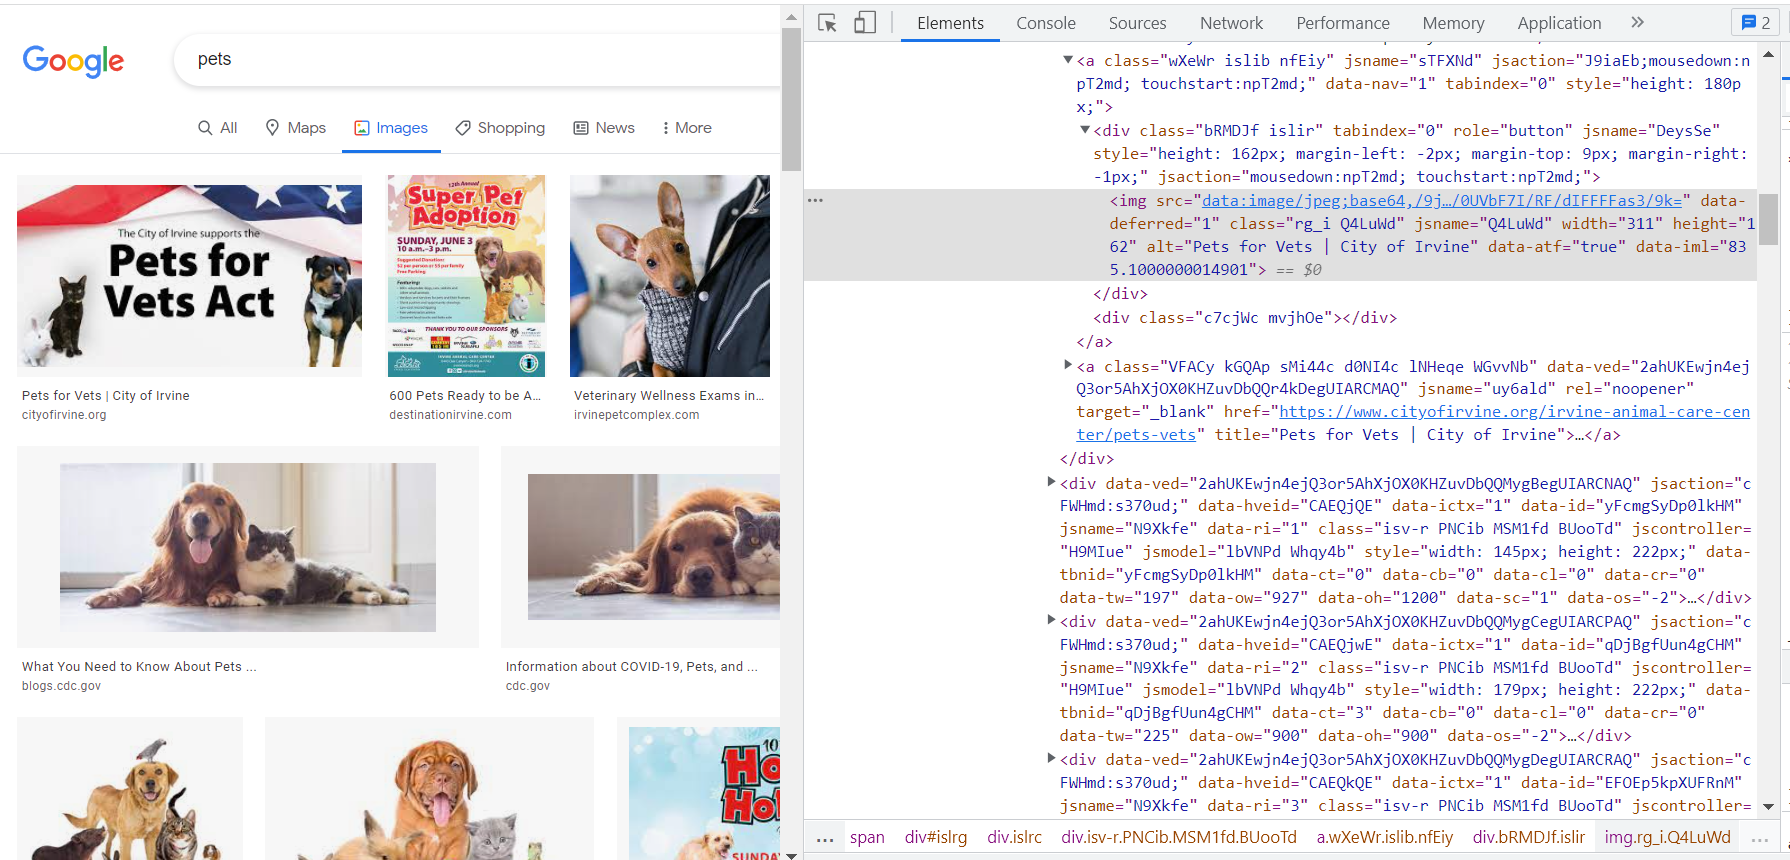

On the HTML screen, you will see highlighted the HTML line containing the attributes related to the selected image. We find that the class = "rg_i Q4LuWd". 

If you move the cursor over other images on the web page you will see a pattern where all of the classes contain the values "Q4LuWd". 

So, we want to find, extract and store the objects where class contains the values "Q4LuWd". 

**Find and Extract Images** 

We will use the find_elements_by_xpath() function to identify the images.

In [ ]:
imgResults = driver.find_elements(By.XPATH,"//img[contains(@class,'Q4LuWd')]")
imgResults

All of the images that contained "Q4LuWD" in the class name are now stored in imgResults which is a selenium object. If you display the imgResults you will only see a description of the selenium object.   

Now we need to download the images. To retrieve an image we need to access the "src" attribute. The value of the src attribute is a URL that will open the image on a new page where we will use python functions to download the image.

We will use the image_object.get_attribute(‘src’) function to access the scr attribute. 
The get_attribute function returns the attribute value of the parameter sent as an argument.

In [8]:
src = []
for img in imgResults:
    src.append(img.get_attribute('src'))

The src list contains the list of image URL's. We will now go through the list and use a python function to download the images. 

**Download Images**

In [9]:
for i in range(10):
    urllib.request.urlretrieve(str(src[i]),"sample_data/pets{}.jpg".format(i))

The loop will run 10 times and download 10 images to your file folder. You can specify a higher number if you need more images. 

The urllib.request.urlretreive() function has two arguments. The first is a URL, and the second is the file path where you want to store the downloaded image. Each image will be stored in a seperate file.  

The downloaded images are stored in your file folder. I combined the image files into a single PDF file shown below.

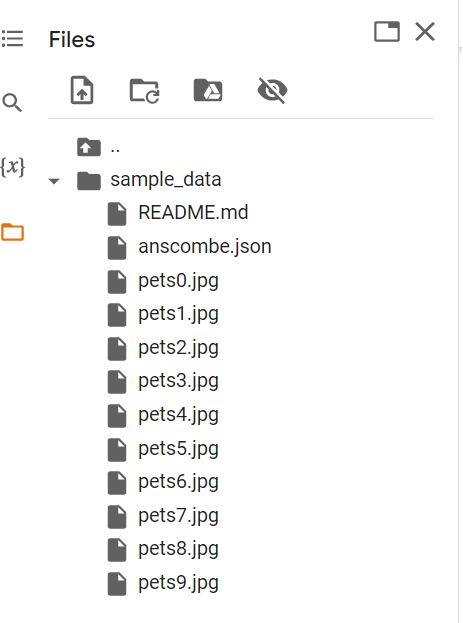

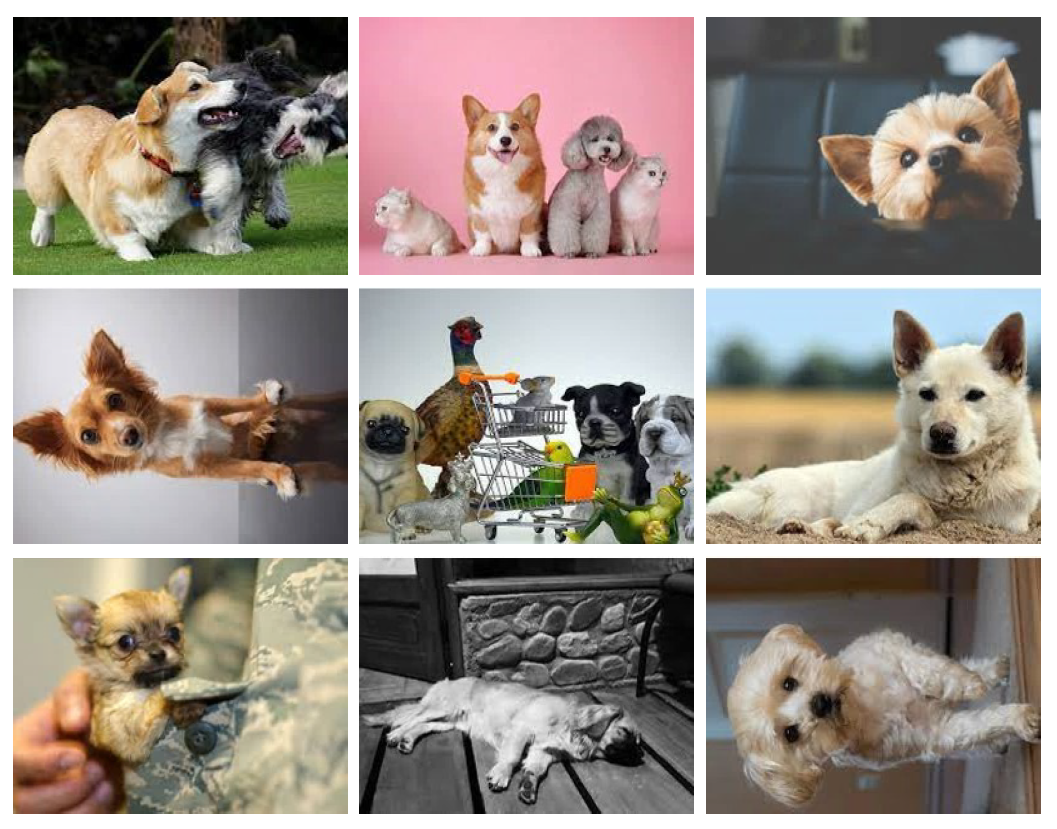